In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('cleaned_data.csv')

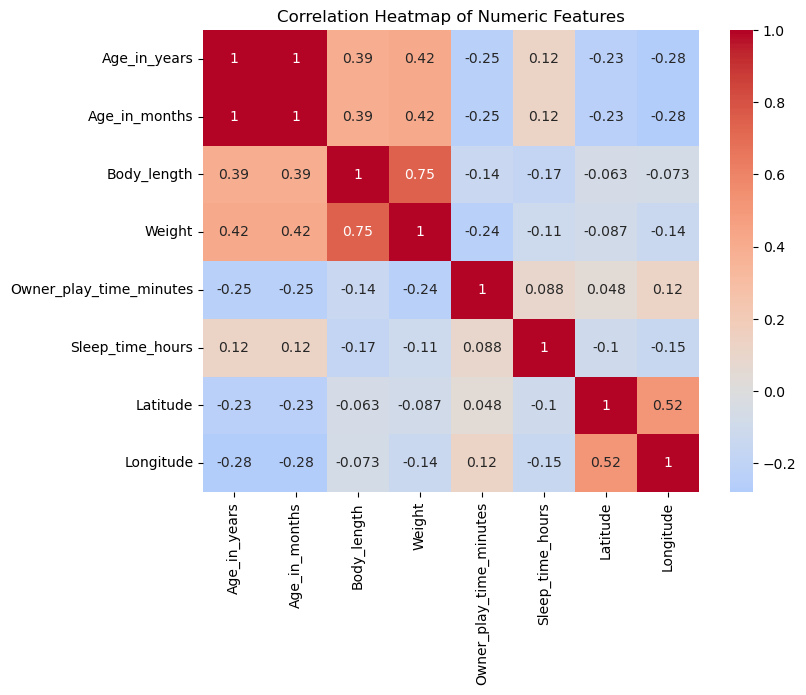

In [3]:
# Select numeric columns only
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [8]:
df.rename(columns={'Sleep_time_hours': 'Sleep', 'Age_in_years':'Age'}, inplace= True)

In [9]:
df.tail()

,Breed,Age,Age_in_months,Gender,Neutered_or_spayed,Body_length,Weight,Fur_colour_dominant,Fur_pattern,Eye_colour,Allowed_outdoor,Preferred_food,Owner_play_time_minutes,Sleep,Country,Latitude,Longitude
720,Angora,3.67,44.0,male,False,37.0,4.6,white,solid,amber,FALSE,wet,32.0,14.0,France,43.61166,3.87771
721,Angora,3.75,45.0,male,True,43.0,3.9,white,solid,blue,FALSE,wet,38.0,14.0,USA,39.29038,-76.61219
722,Angora,3.83,46.0,male,False,37.0,4.1,white,solid,green,FALSE,wet,38.0,16.0,USA,38.89511,-77.03637
723,Angora,3.83,46.0,male,True,40.0,4.8,black,bicolor,amber,TRUE,wet,11.0,15.0,USA,40.71427,-74.00597
724,Angora,4.17,50.0,female,True,35.0,2.8,white,solid,amber,TRUE,dry,28.0,14.0,USA,45.52345,-122.67621


/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 30.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 32.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 28.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 28.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 12.8% of the p

<Axes: xlabel='Sleep', ylabel='Age'>

/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 32.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 26.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


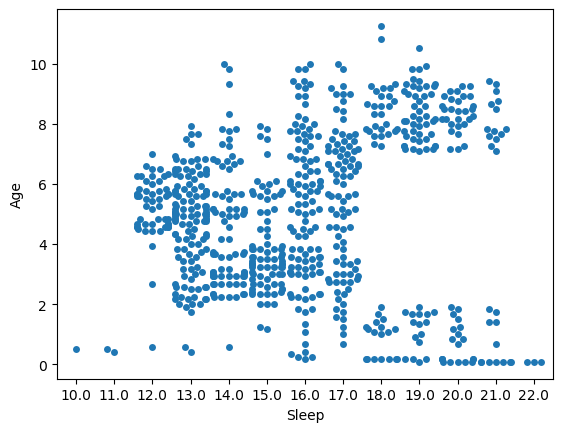

In [10]:
sns.swarmplot(data=df, x='Sleep', y='Age')

# I quickly realized that I need to do a graph by means

In [11]:
df_grouped = df.groupby('Age')['Sleep'].mean().reset_index()

In [12]:
df_grouped.tail()

,Age,Sleep
114,9.92,19.000000
115,10.00,15.666667
116,10.50,19.000000
117,10.83,18.000000
118,11.25,18.000000


# Realized there's too many ages....

In [13]:
bins = np.arange(0, 11.5 + 0.5, 0.5)  # 12.5 ensures 12 is included

df['Age_Group'] = pd.cut(df['Age'], bins=bins)


/var/folders/2z/6t6dl78d7b96q7xq1y4dzzw00000gn/T/ipykernel_73387/2458537659.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('Age_Group')['Sleep'].mean().reset_index()


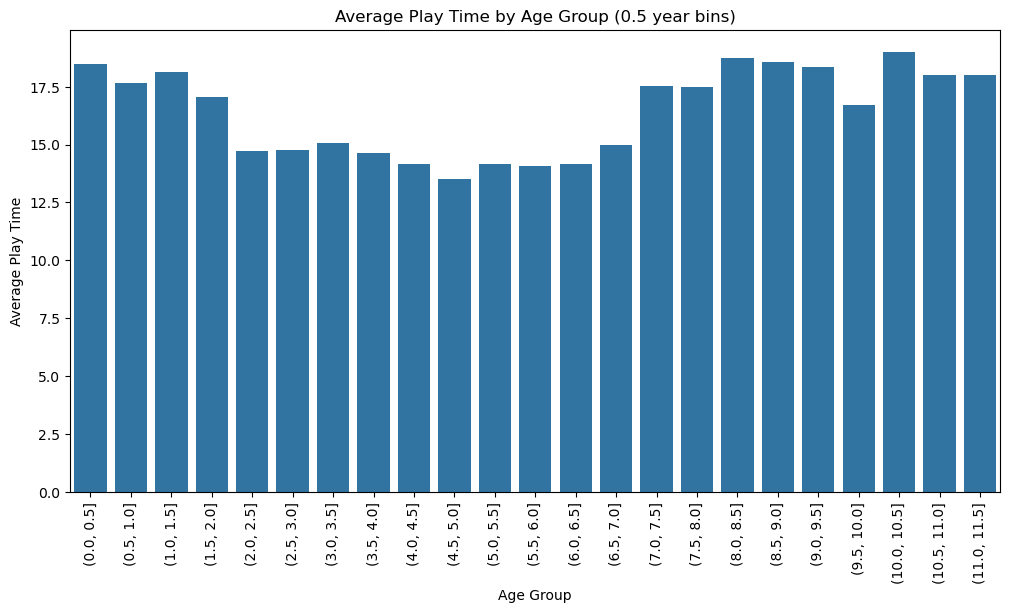

In [14]:
grouped = df.groupby('Age_Group')['Sleep'].mean().reset_index()

# Step 2: Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='Age_Group', y='Sleep')
plt.xticks(rotation=90)  # rotate x labels so they don't overlap
plt.title('Average Play Time by Age Group (0.5 year bins)')
plt.xlabel('Age Group')
plt.ylabel('Average Play Time')
plt.show()

# I need to condense this data down..

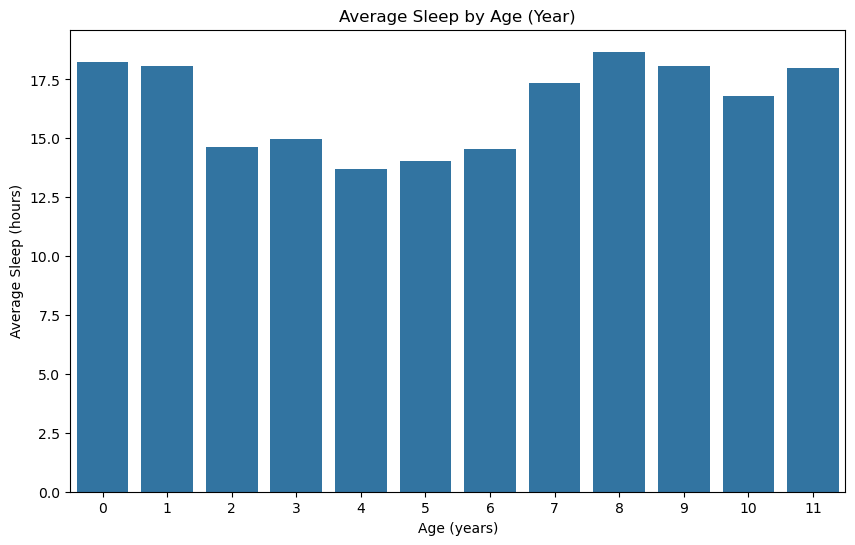

In [15]:
# Create a new column with the integer part of the age
df['Age_Year'] = df['Age'].astype(int)

# Now group by Age_Year and plot mean Sleep
grouped = df.groupby('Age_Year')['Sleep'].mean().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=grouped, x='Age_Year', y='Sleep')
plt.title('Average Sleep by Age (Year)')
plt.xlabel('Age (years)')
plt.ylabel('Average Sleep (hours)')
plt.show()


In [16]:
from scipy import stats

# Create list of arrays, one per group
groups = [group['Sleep'].values for name, group in df.groupby('Age_Year')]

# Run ANOVA
f_stat, p_val = stats.f_oneway(*groups)
print(f"ANOVA test: F = {f_stat:.3f}, p = {p_val:.4f}")

ANOVA test: F = 65.226, p = 0.0000


# This means that.. interpret it later

# The high F-value (65.226) suggests there is a large difference between the group means relative to the variability within each group.
The p-value (0.0000) means the result is extremely statistically significant — well below any common alpha level (e.g., 0.05, 0.01).

# FOR CAPSTONE PROJECT BUILD A MODEL TO PREDICT SLEEP BASED ON A NUMBER OF FACTORS...

In [18]:
df.describe()

,Age,Age_in_months,Body_length,Weight,Owner_play_time_minutes,Sleep,Latitude,Longitude,Age_Year
count,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000
mean,4.984855,59.817931,45.322759,5.725186,22.322759,15.852414,44.240857,-65.248047,4.536552
std,2.609026,31.308878,16.411763,2.287228,10.685514,2.571413,4.882001,44.503271,2.590964
min,0.080000,1.000000,10.000000,0.500000,0.000000,10.000000,37.774930,-123.116226,0.000000
25%,3.000000,36.000000,36.000000,4.100000,13.000000,14.000000,40.714270,-87.623177,3.000000
50%,5.080000,61.000000,43.000000,5.450000,22.000000,16.000000,42.358430,-74.005970,5.000000
75%,7.170000,86.000000,52.000000,7.270000,30.000000,18.000000,47.606210,-2.991573,7.000000
max,11.250000,135.000000,102.000000,11.700000,60.000000,22.000000,53.800755,13.404954,11.000000
